In [18]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

pd.options.display.max_columns = 150

In [2]:
os.getcwd()

'C:\\Users\\HT\\Desktop\\Coderschool\\Mydoing\\Data Science Project'

In [20]:
# import data
train = pd.read_csv('Dataset/dataset/train.csv')
test = pd.read_csv('Dataset/dataset/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [21]:
train.shape, test.shape

((9557, 143), (23856, 142))

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
train.shape

(9557, 143)

In [23]:
train.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [24]:
train.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


In [25]:
train['Target'].unique

<bound method Series.unique of 0       4
1       4
2       4
3       4
4       4
       ..
9552    2
9553    2
9554    2
9555    2
9556    2
Name: Target, Length: 9557, dtype: int64>

In [11]:
train['Target'].value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

In [14]:
train['idhogar'].value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
6b35cdcf0    11
3fe29a56b    11
             ..
46d164f3e     1
597fd9997     1
3978b4e54     1
82d30ebd8     1
d98666926     1
Name: idhogar, Length: 2988, dtype: int64

In [ ]:
# # Metrics
# # Ultimately we want to build a machine learning model that can predict
# # integer poverty level of a household.
# # we use metrics F1 score for binary classification
# from sklearn.metrics import f1_score
# f1_score(y_true, y_predicted, average='marco')


### ROADMAP
1. Understand problem
2. EDA
3. Feature Engineering
4. Compare several baseline machine learning model
5. Tunning model
6. Ensemble model

### Data of Objects
#### Random Variables
1. Relationship
2. trends
3. Correlation
4. pattern
5. outliers


- To make a dataset for model

Text(0.5, 1.0, 'Count of Unique in Integer Columns')

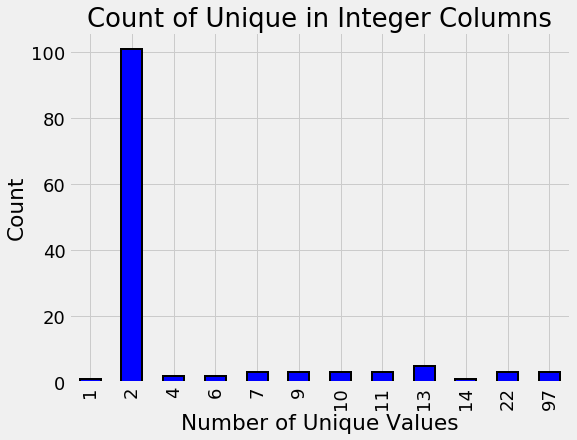

In [30]:
integer = train.select_dtypes(np.int64).nunique()
integer = integer.value_counts().sort_index()
integer.plot.bar(color='blue', figsize=(8, 6), edgecolor='k',
                 linewidth=2)
plt.xlabel('Number of Unique Values')
plt.ylabel('Count')
plt.title('Count of Unique in Integer Columns')

In [40]:
train.select_dtypes('float').describe()

,v2a1,v18q1,rez_esc,meaneduc,overcrowding,SQBovercrowding,SQBdependency,SQBmeaned
count,2.697000e+03,2215.000000,1629.000000,9552.000000,9557.000000,9557.000000,9557.000000,9552.000000
mean,1.652316e+05,1.404063,0.459791,9.231523,1.605380,3.249485,3.900409,102.588867
std,1.504571e+05,0.763131,0.946550,4.167694,0.819946,4.129547,12.511831,93.516890
min,0.000000e+00,1.000000,0.000000,0.000000,0.200000,0.040000,0.000000,0.000000
25%,8.000000e+04,1.000000,0.000000,6.000000,1.000000,1.000000,0.111111,36.000000
50%,1.300000e+05,1.000000,0.000000,9.000000,1.500000,2.250000,0.444444,81.000000
75%,2.000000e+05,2.000000,1.000000,11.600000,2.000000,4.000000,1.777778,134.560010
max,2.353477e+06,6.000000,5.000000,37.000000,6.000000,36.000000,64.000000,1369.000000


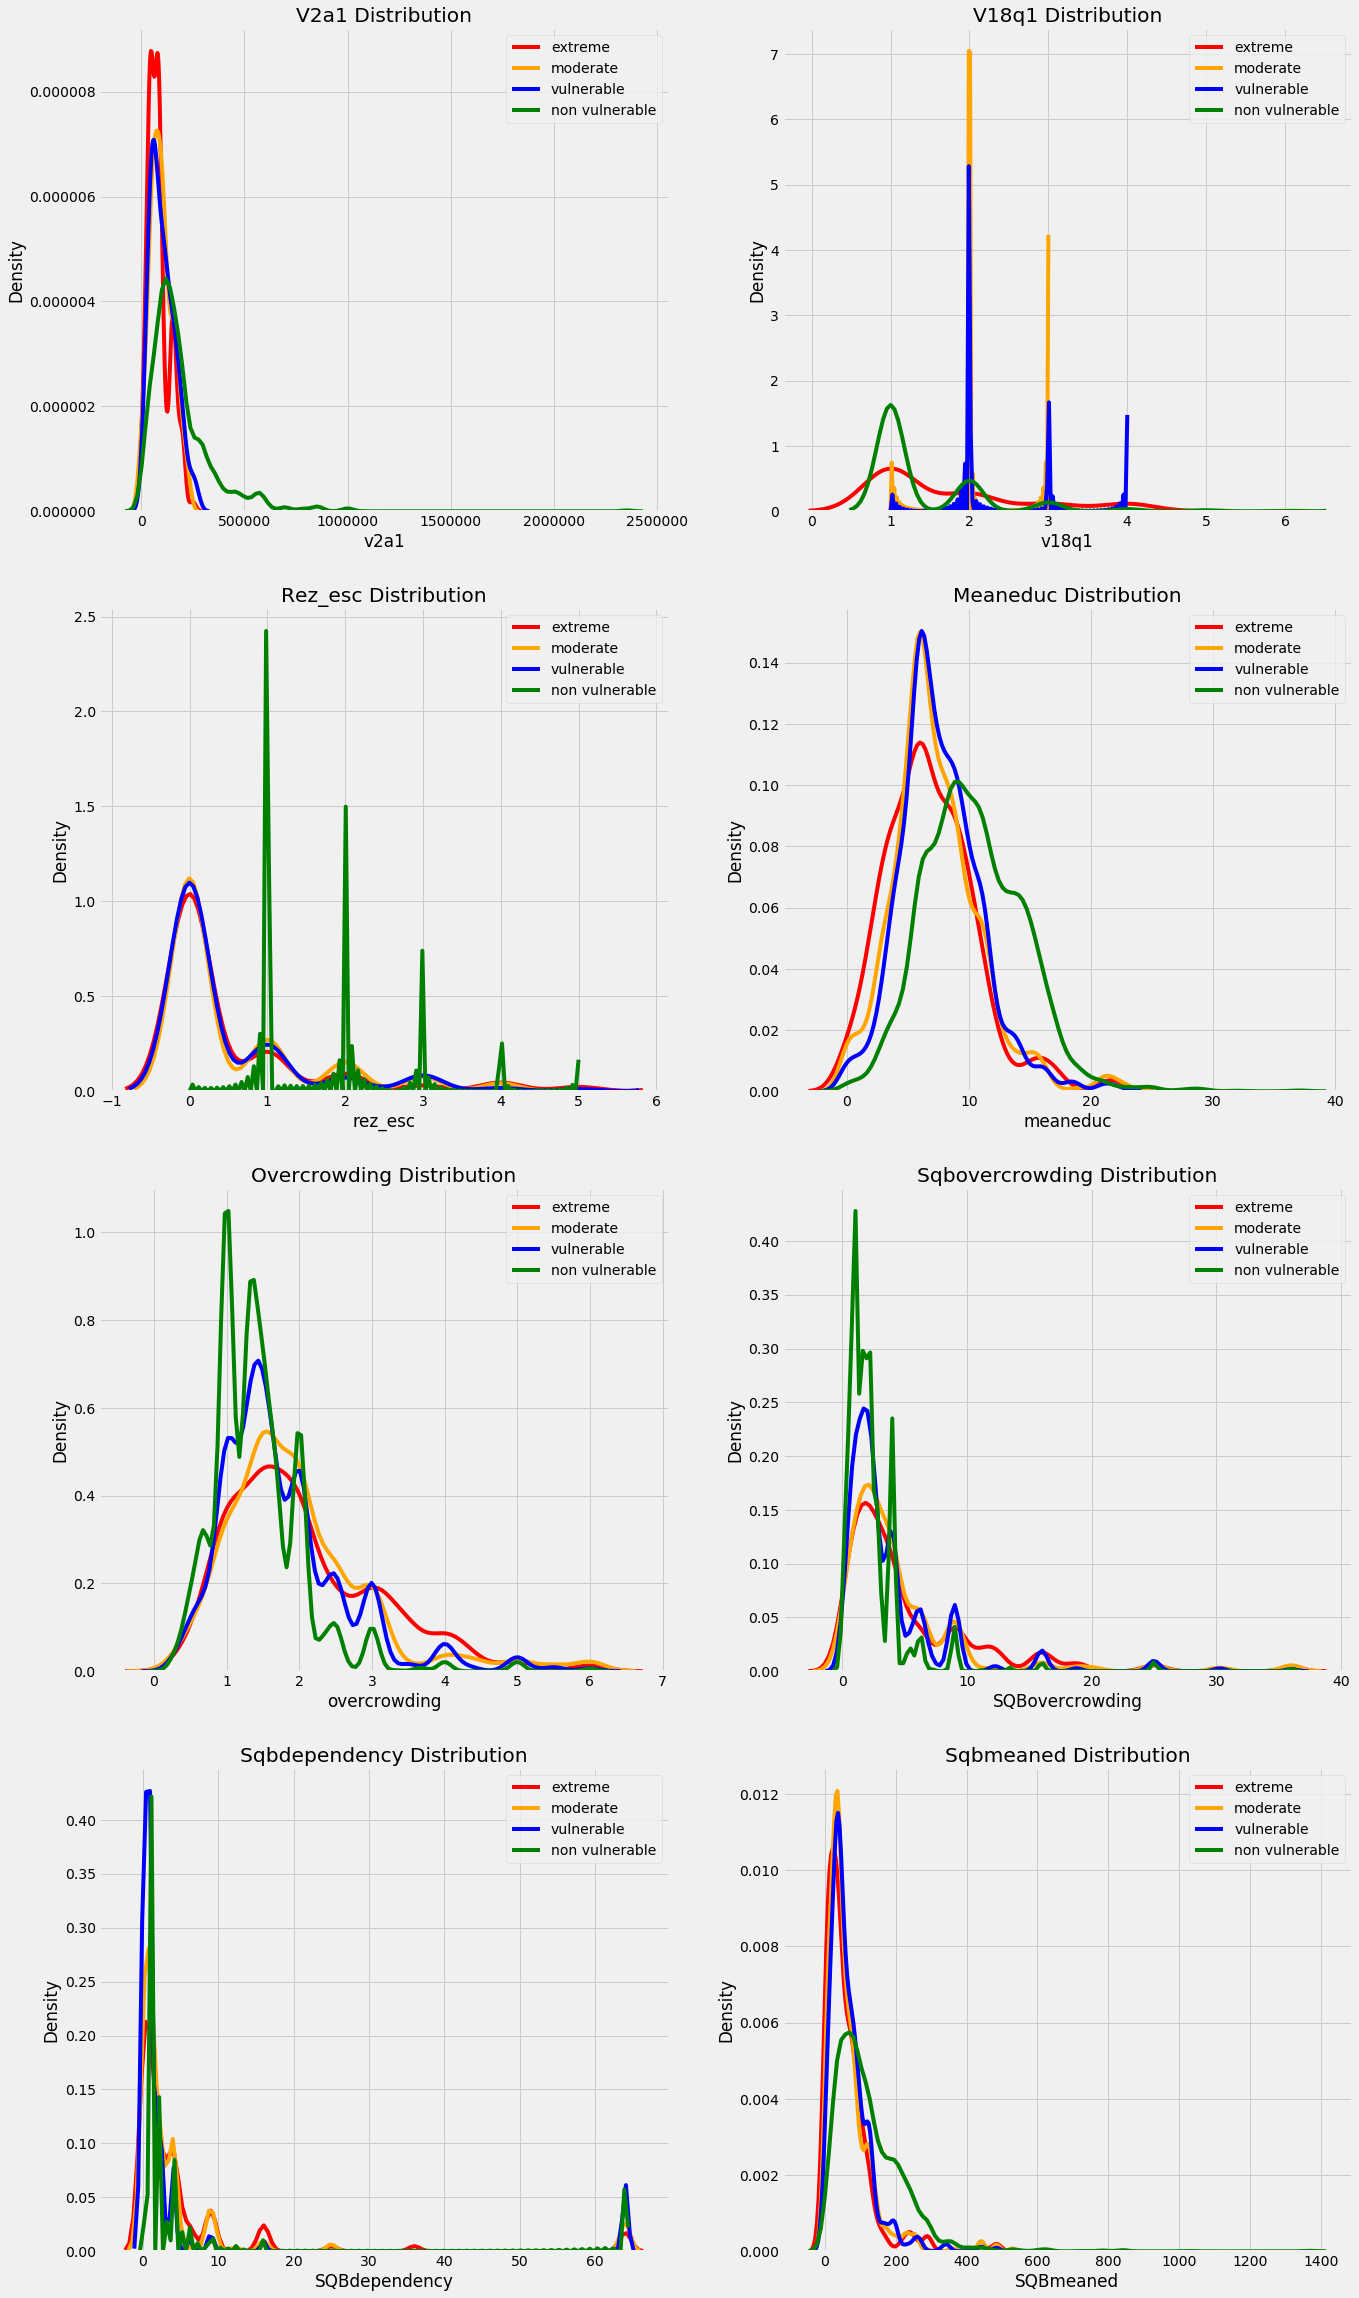

In [39]:
# Float columns
from collections import OrderedDict

plt.figure(figsize=(20, 16))
plt.style.use('fivethirtyeight')

#color mapping 
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})

poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable',
                      4: 'non vulnerable'})

# Iterate through the float columns
for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4, 2, i+1)
    #Iterate through the poverty levels
    for poverty_level, color in colors.items():
        #Plot each poverty level as a separate line
    
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])
    plt.title(f"{col.capitalize()} Distribution")
    plt.xlabel(f"{col}")
    plt.ylabel('Density')
plt.subplots_adjust(top=2)

        
        
    



In [36]:
for index, value in colors.items():
    print(index, value)

1 red
2 organe
3 blue
4 green


In [41]:
# object columns
train.select_dtypes('object')

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no
...,...,...,...,...,...
9552,ID_d45ae367d,d6c086aa3,.25,9,no
9553,ID_c94744e07,d6c086aa3,.25,9,no
9554,ID_85fc658f8,d6c086aa3,.25,9,no
9555,ID_ced540c61,d6c086aa3,.25,9,no


In [46]:
# train.select_dtypes('object').apply(pd.Series.value_counts)

In [49]:
mapping = {'yes': 1, 'no': 0}

#apply same operation to both train and test
for df in [train, test]:
    # Fill in the values with correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    
train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


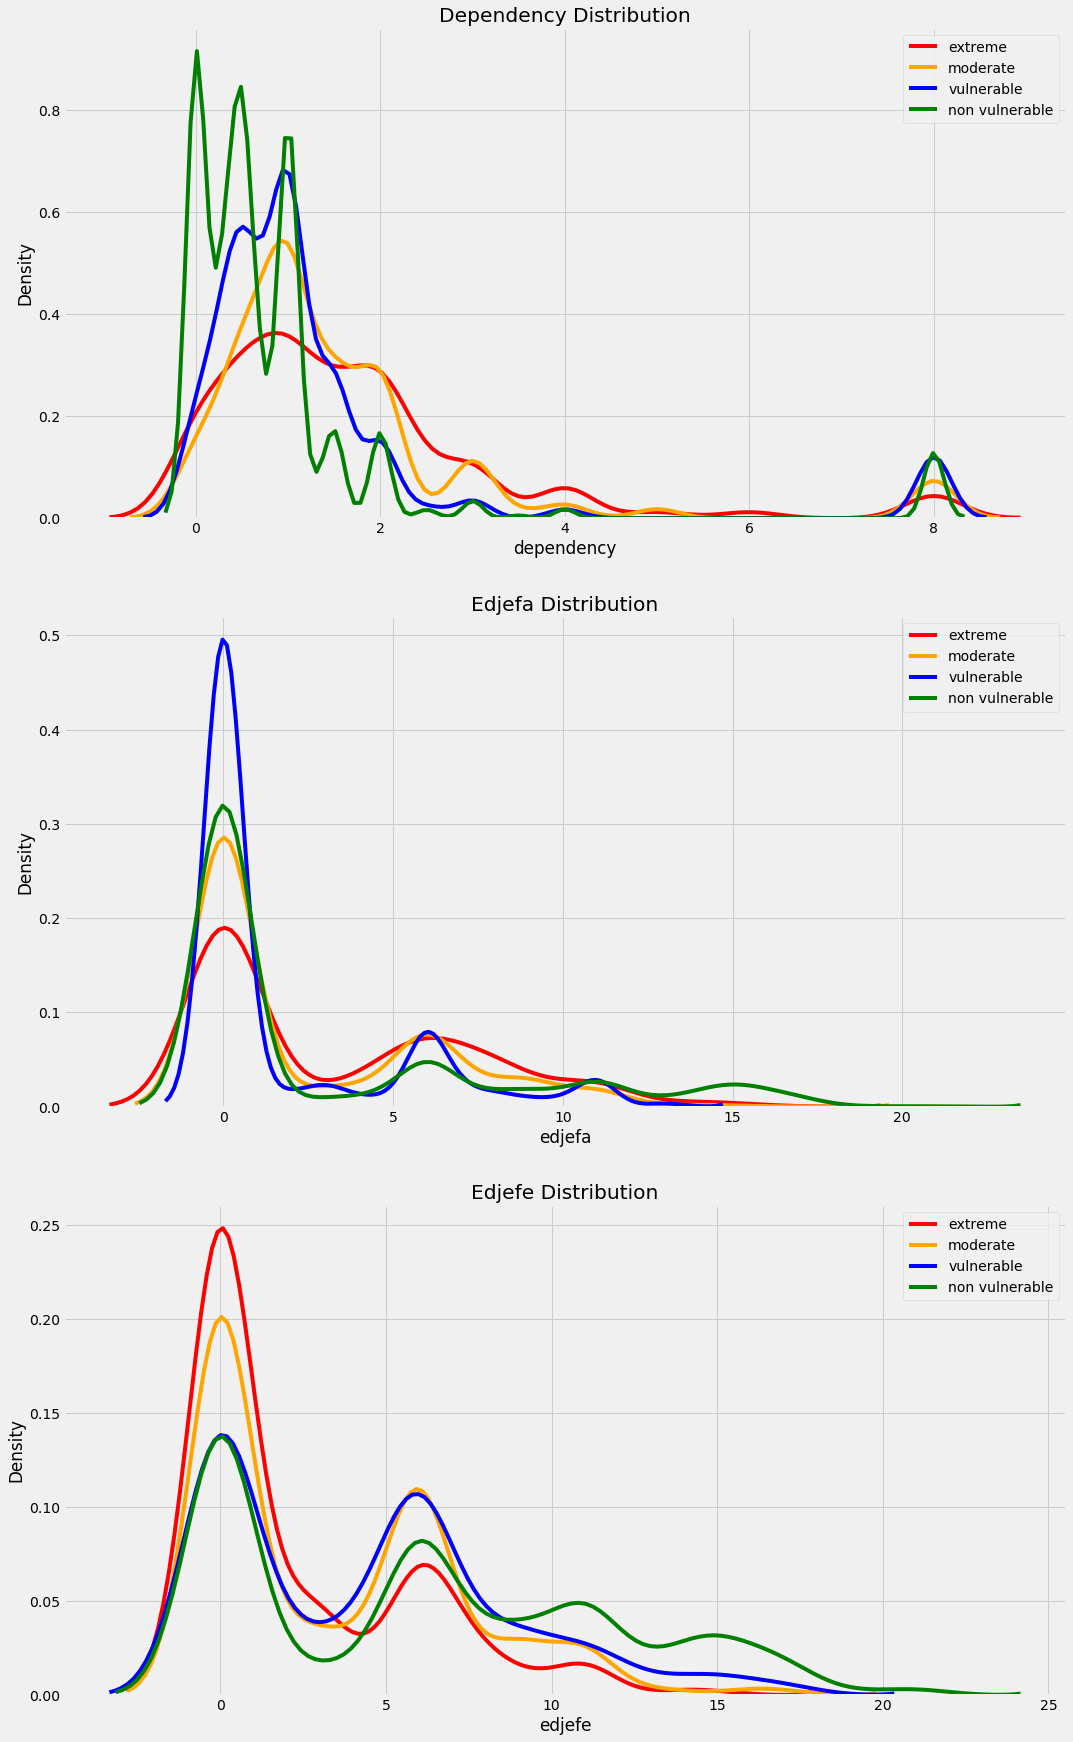

In [51]:
plt.figure(figsize=(16, 12))

# iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i+1)
    #iterate through the poverty levels
    for poverty_level, color in colors.items():
        #Plot each poverty level as a sepatate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(),
                    ax=ax, color=color, label=poverty_mapping[poverty_level])
        plt.title(f"{col.capitalize()} Distribution")
        plt.xlabel(f"{col}")
        plt.ylabel('Density')
    
plt.subplots_adjust(top=2)

In [52]:
data = train.append(test, ignore_index=True)
data.head(5)

C:\Users\HT\Miniconda3\envs\cs_ftmle\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,Id,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBmeaned,SQBovercrowding,Target,abastaguadentro,abastaguafuera,abastaguano,age,agesq,area1,area2,bedrooms,cielorazo,computer,coopele,dependency,dis,edjefa,edjefe,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,epared1,epared2,epared3,escolari,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,female,hacapo,hacdor,hhsize,hogar_adul,hogar_mayor,hogar_nin,hogar_total,idhogar,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,male,meaneduc,mobilephone,noelec,overcrowding,paredblolad,pareddes,paredfibras,paredmad,paredother,paredpreb,paredzinc,paredzocalo,parentesco1,parentesco10,parentesco11,parentesco12,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,pisocemento,pisomadera,pisomoscer,pisonatur,pisonotiene,pisoother,planpri,public,qmobilephone,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,refrig,rez_esc,rooms,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,tamhog,tamviv,techocane,techoentrepiso,techootro,techozinc,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
0,ID_279628684,1849,0.0,100,100,0,1,100.0,1.000000,4.0,1,0,0,43,1849,1,0,1,1,0,0,0.0,0,0.0,10.0,1,0,0,0,0,0,0,0,1,0,0,1,0,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,21eb7fcc1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,10.0,1,0,1.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,NaN,3,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,NaN,190000.0
1,ID_f29eb3ddd,4489,64.0,144,144,0,1,144.0,1.000000,4.0,1,0,0,67,4489,1,0,1,1,0,0,8.0,0,0.0,12.0,1,0,0,0,0,0,0,1,0,0,0,1,0,12,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0e5d7a658,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12.0,1,0,1.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,NaN,4,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1.0,135000.0
2,ID_68de51c94,8464,64.0,0,121,0,1,121.0,0.250000,4.0,1,0,0,92,8464,1,0,2,1,0,0,8.0,1,11.0,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,11,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,2c7317ea8,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,11.0,0,0,0.500000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,NaN,8,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,NaN,NaN
3,ID_d671db89c,289,1.0,121,81,4,16,121.0,1.777778,4.0,1,0,0,17,289,1,0,3,1,0,0,1.0,0,0.0,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,9,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,4,2,0,2,4,2b58d945f,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,11.0,1,0,1.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,2,2,1,1,2,1,3,4,1,1.0,5,0,1,0,0,0,4,4,0,0,0,1,0,0,0,1,0,0,1,1,1.0,180000.0
4,ID_d56d6f5f5,1369,1.0,121,121,4,16,121.0,1.777778,4.0,1,0,0,37,1369,1,0,3,1,0,0,1.0,0,0.0,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,11,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,4,2,0,2,4,2b58d945f,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,11.0,1,0,1.333333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,2,2,1,1,2,1,3,4,1,NaN,5,0,1,0,0,0,4,4,0,0,0,1,0,0,0,1,0,0,1,1,1.0,180000.0


In [54]:
# Heads of household
heads = data.loc[data['parentesco1'] == 1].copy()

#Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1'] == 1),
                        ['Target', 'idhogar']]

#Value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()


In [56]:
# bar plot pf occurrences of each label

type(train_labels)

pandas.core.frame.DataFrame

In [58]:
type(label_counts)

pandas.core.series.Series

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

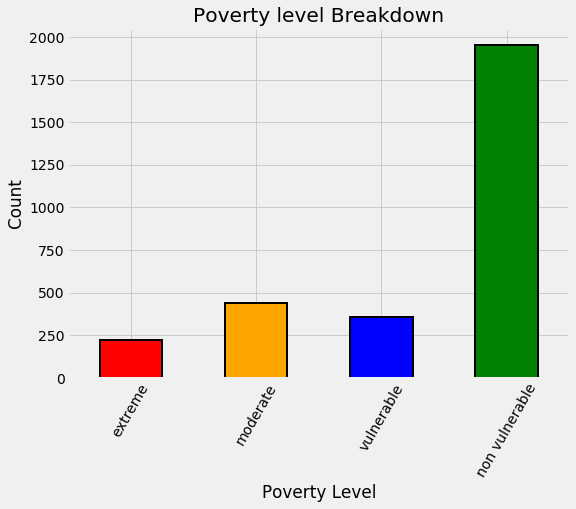

In [60]:
label_counts.plot.bar(figsize=(8, 6), color= colors.values(),
                      edgecolor='k', linewidth=2)
# Formatting
plt.xlabel('Poverty Level')
plt.ylabel('Count')
plt.xticks([x-1 for x in poverty_mapping.keys()],
           list(poverty_mapping.values()), rotation=60)
plt.title('Poverty level Breakdown')

label_counts

In [ ]:
# one problem with imbalanced classification problems is that 
# Machine learning model can have a difficult time predicting the minority classes

In [62]:
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

#Households where targets are not all equal

not_equal = all_equal[all_equal != True]

print(f" There are {len(not_equal)} households where the family members do not all have the same target")


 There are 85 households where the family members do not all have the same target


In [63]:
# show 85 households

train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]



,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [64]:
households_leader = train.groupby('idhogar')['parentesco1'].sum()

#Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader == 0].index), :]

print(f"There are {households_no_head['idhogar'].nunique()} households without a head")

There are 15 households without a head


In [65]:
# Find households without a head and where labels are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


In [66]:
# Iterate through each household
for household in not_equal.index:
    # Find the correct label (for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    
    # Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target
    
    
# Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))


There are 0 households where the family members do not all have the same target.


In [67]:
# Missing variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33413 entries, 0 to 33412
Columns: 143 entries, Id to v2a1
dtypes: float64(12), int64(129), object(2)
memory usage: 36.5+ MB


In [68]:
data.head()

,Id,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBmeaned,SQBovercrowding,Target,abastaguadentro,abastaguafuera,abastaguano,age,agesq,area1,area2,bedrooms,cielorazo,computer,coopele,dependency,dis,edjefa,edjefe,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,epared1,epared2,epared3,escolari,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,female,hacapo,hacdor,hhsize,hogar_adul,hogar_mayor,hogar_nin,hogar_total,idhogar,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,male,meaneduc,mobilephone,noelec,overcrowding,paredblolad,pareddes,paredfibras,paredmad,paredother,paredpreb,paredzinc,paredzocalo,parentesco1,parentesco10,parentesco11,parentesco12,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,pisocemento,pisomadera,pisomoscer,pisonatur,pisonotiene,pisoother,planpri,public,qmobilephone,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,refrig,rez_esc,rooms,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,tamhog,tamviv,techocane,techoentrepiso,techootro,techozinc,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
0,ID_279628684,1849,0.0,100,100,0,1,100.0,1.000000,4.0,1,0,0,43,1849,1,0,1,1,0,0,0.0,0,0.0,10.0,1,0,0,0,0,0,0,0,1,0,0,1,0,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,21eb7fcc1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,10.0,1,0,1.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,NaN,3,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,NaN,190000.0
1,ID_f29eb3ddd,4489,64.0,144,144,0,1,144.0,1.000000,4.0,1,0,0,67,4489,1,0,1,1,0,0,8.0,0,0.0,12.0,1,0,0,0,0,0,0,1,0,0,0,1,0,12,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0e5d7a658,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,12.0,1,0,1.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,1,NaN,4,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1.0,135000.0
2,ID_68de51c94,8464,64.0,0,121,0,1,121.0,0.250000,4.0,1,0,0,92,8464,1,0,2,1,0,0,8.0,1,11.0,0.0,1,0,0,0,0,0,0,1,0,0,0,1,0,11,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,2c7317ea8,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,11.0,0,0,0.500000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,1,NaN,8,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,NaN,NaN
3,ID_d671db89c,289,1.0,121,81,4,16,121.0,1.777778,4.0,1,0,0,17,289,1,0,3,1,0,0,1.0,0,0.0,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,9,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,4,2,0,2,4,2b58d945f,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,11.0,1,0,1.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,2,2,1,1,2,1,3,4,1,1.0,5,0,1,0,0,0,4,4,0,0,0,1,0,0,0,1,0,0,1,1,1.0,180000.0
4,ID_d56d6f5f5,1369,1.0,121,121,4,16,121.0,1.777778,4.0,1,0,0,37,1369,1,0,3,1,0,0,1.0,0,0.0,11.0,1,0,0,0,0,0,0,1,0,0,0,0,1,11,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,4,2,0,2,4,2b58d945f,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,11.0,1,0,1.333333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,2,2,1,1,2,1,3,4,1,NaN,5,0,1,0,0,0,4,4,0,0,0,1,0,0,0,1,0,0,1,1,1.0,180000.0


In [73]:
# # number of missing in each column

# total = data.isnull().sum()
# percent = total / len(data)
# missing = pd.DataFrame(data = [total, percent], columns=['total', 'percent'])
# missing

In [74]:
# Number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

# Create a percentage missing
missing['percent'] = missing['total'] / len(data)

missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,27581,0.825457
v18q1,25468,0.762218
v2a1,24263,0.726154
meaneduc,36,0.001077
SQBmeaned,36,0.001077
parentesco7,0,0.000000
parentesco2,0,0.000000
parentesco3,0,0.000000
parentesco4,0,0.000000
